<a href="https://colab.research.google.com/github/16Br04/Time-Series-Forcasting/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# importing all the importanat libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [122]:
# fetching the required data
df=yf.download('BTC-USD',start='2020-01-01',end=pd.Timestamp.today().strftime('2025-05-08'))
df.reset_index(inplace=True)

/tmp/ipython-input-2551668663.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download('BTC-USD',start='2020-01-01',end=pd.Timestamp.today().strftime('2025-05-08'))
[*********************100%***********************]  1 of 1 completed


In [123]:
# Display the entire DataFrame
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...,...
1949,2025-05-03,95891.796875,96943.882812,95821.289062,96904.632812,15775154889
1950,2025-05-04,94315.976562,96318.921875,94173.429688,95877.187500,18198688416
1951,2025-05-05,94748.054688,95193.187500,93566.265625,94319.562500,25816260327


In [77]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           1954 non-null   datetime64[ns]
 1   (Close, BTC-USD)   1954 non-null   float64       
 2   (High, BTC-USD)    1954 non-null   float64       
 3   (Low, BTC-USD)     1954 non-null   float64       
 4   (Open, BTC-USD)    1954 non-null   float64       
 5   (Volume, BTC-USD)  1954 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 91.7 KB


In [78]:
# Display the first few rows of the DataFrame
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [79]:
# Check for any missing values in the DataFrame
df.isnull().sum()

,,0
Price,Ticker,
Date,,0
Close,BTC-USD,0
High,BTC-USD,0
Low,BTC-USD,0
Open,BTC-USD,0
Volume,BTC-USD,0


In [80]:
# Select only the 'Date' and 'Close' columns from the DataFrame
df = df[['Date', 'Close']]
df

Price,Date,Close
Ticker,,BTC-USD
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383
...,...,...
1949,2025-05-03,95891.796875
1950,2025-05-04,94315.976562
1951,2025-05-05,94748.054688


<function matplotlib.pyplot.show(close=None, block=None)>

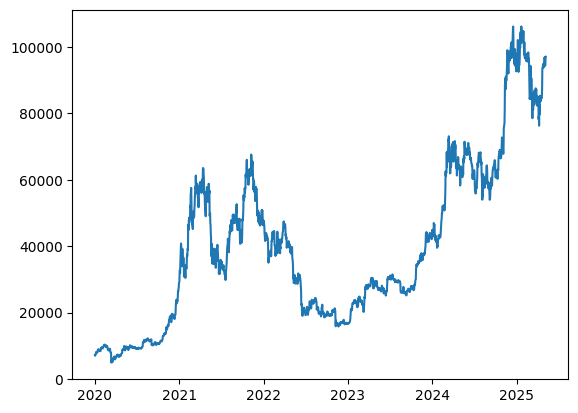

In [81]:
plt.plot(df.Date, df.Close)
plt.show

In [82]:
int (len(df)*0.8)

1563

In [126]:
# Training and tecting the data
to_row = int (len(df)*0.8)


training_data = df[0:to_row]['Close']
print(training_data)
testing_data = df[to_row:]['Close']
print(testing_data)


Ticker       BTC-USD
0        7200.174316
1        6985.470215
2        7344.884277
3        7410.656738
4        7411.317383
...              ...
1558    69362.554688
1559    71631.359375
1560    69139.015625
1561    70587.882812
1562    70060.609375

[1563 rows x 1 columns]
Ticker       BTC-USD
1563    67195.867188
1564    63821.472656
1565    65738.726562
1566    63426.210938
1567    63811.863281
...              ...
1949    95891.796875
1950    94315.976562
1951    94748.054688
1952    96802.476562
1953    97032.320312

[391 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

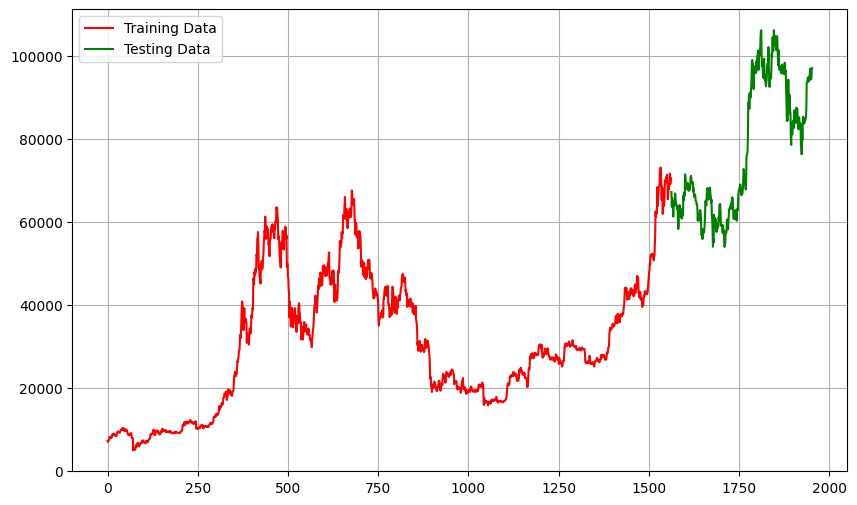

In [84]:
# visualizing the training and testing data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(training_data, 'red' , label='Training Data')
plt.plot(testing_data, 'green',label='Testing Data')
plt.legend()
plt.show

In [131]:
# Define and fit the SARIMAX model
model = SARIMAX(training_data, order=(0,1,1), seasonal_order=(0,1,1,12))# instread of procenssing intire data only the testing data is process
model_fit = model.fit(disp=False)

In [134]:
# Generate forecasts for the testing period
forecast_steps = len(testing_data)

# 'start' is the index of the first observation in the testing set (1563)
# 'end' is the index of the last observation in the testing set (1953)
start_index = training_data.index[-1] + 1
end_index = start_index + forecast_steps - 1

forecast = model_fit.predict(start=start_index, end=end_index, dynamic=False)
# Get the confidence intervals for the forecast
forecast_ci = model_fit.get_prediction(start=start_index, end=end_index, dynamic=False).conf_int()

In [110]:
# Generate future forecasts and their confidence intervals
forecast = model_fit.get_forecast(steps=60)
forecast_ci = forecast.conf_int()

In [138]:
print(testing_data.columns)

Index(['BTC-USD'], dtype='object', name='Ticker')


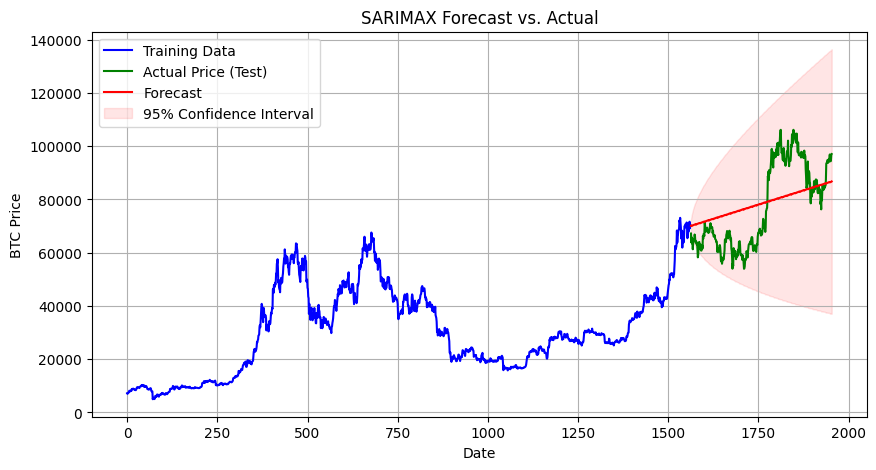

In [141]:
# Create a date index for the forecast results
forecast.index = testing_data.index
forecast_ci.index = testing_data.index

# Plot the actual prices and the forecast with confidence intervals
plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(training_data.index, training_data, color='blue', label='Training Data')
plt.plot(testing_data.index, testing_data, color='green', label='Actual Price (Test)')
plt.plot(forecast.index, forecast, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.1, label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title('SARIMAX Forecast vs. Actual')
plt.legend()
plt.show()

In [142]:
#getting the summarry about the model
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                            BTC-USD   No. Observations:                 1563
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -13228.087
Date:                            Thu, 30 Oct 2025   AIC                          26462.175
Time:                                    14:43:18   BIC                          26478.213
Sample:                                         0   HQIC                         26468.140
                                           - 1563                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0524      0.017     -3.028      0.002      -0.086      -0.018
ma.S.L12      -1.0000      0.018   